In [ ]:
import pandas as pd
import numpy as np

# create dataframe
t = {
         "Scenario": ['w1', 'w2', 'w3', 'w4', 'w5'],
         "Probability": [0.2, 0.2, 0.3, 0.2, 0.1],
         "R1": [0.03, 0.17, 0.28, 0.05, -0.04],
         "R2": [0.09, 0.16, 0.10, 0.02, 0.15]
    }

df = pd.DataFrame(t)

# expected value & stdev
E1_a = 0
E2_a = 0
V1 = 0
V2 = 0

# compute mean
for i in range(len(df.index)):
  E1_a += df["R1"][i] * df["Probability"][i]
  E2_a += df["R2"][i] * df["Probability"][i]

# compute variance -> stdev (slide 5 unit 1 lecture 9 - more probability)
for i in range(len(df.index)):
  V1 += (df["R1"][i] - E1_a) ** 2 * df["Probability"][i]
  V2 += (df["R2"][i] - E1_a) ** 2 * df["Probability"][i]

std1_a = np.sqrt(V1)
std2_a = np.sqrt(V2)

print("E1 is " + str(E1_a) + " E2 is " + str(E2_a))
print("std1 is " + str(std1_a) + " std2 is " + str(std2_a))

# pearson correlation
covariance = 0
for i in range(len(df.index)):
  covariance += df["Probability"][i] * (df["R1"][i] - E1_a) * (df["R2"][i] - E2_a)

pearson_correlation_actual = covariance / (std1_a * std2_a)

print(f"Pearson correlation coefficient: {pearson_correlation_actual}")

E1 is 0.13 E2 is 0.099
std1 is 0.11506519890914021 std2 is 0.05683308895353129
Pearson correlation coefficient: 0.16973747019575314


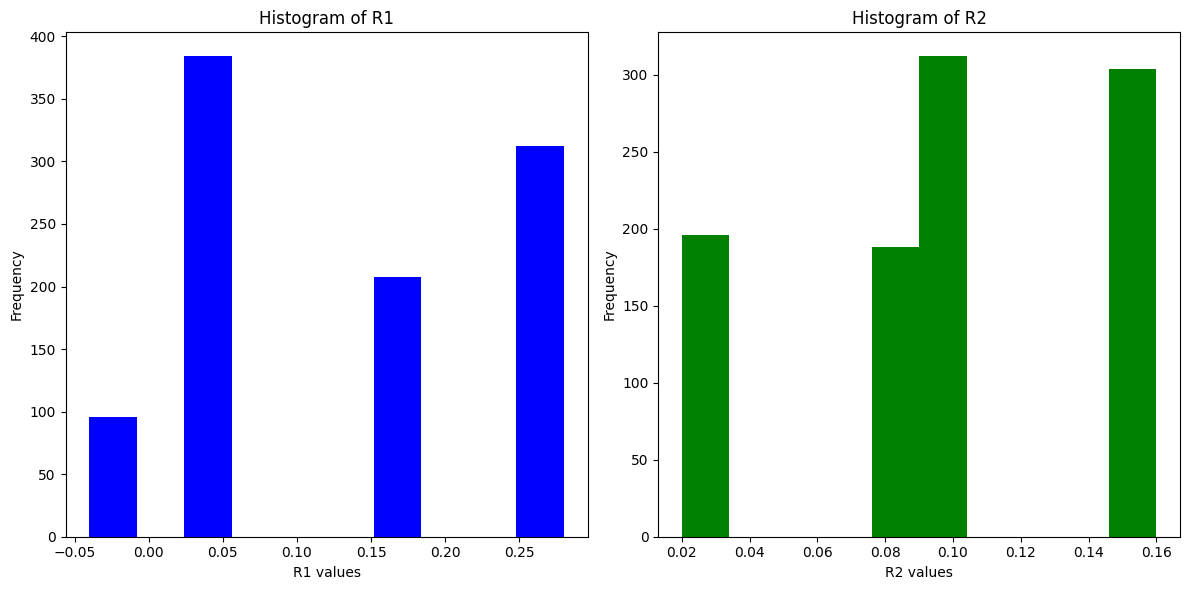

Mean of R1: 0.13432000000000024
Standard deviation of R1: 0.11507796313803934
Mean of R2: 0.09971999999999942
Standard deviation of R2: 0.06746044174180858
Pearson correlation coefficient: 0.1451473767810779


In [ ]:
import matplotlib.pyplot as plt

R1_trials = []
R2_trials = []

for _ in range(1000):
    X = np.random.rand()

    if X < 0.2:
        R1_trials.append(df["R1"][0])
        R2_trials.append(df["R2"][0])
    elif X < 0.4:
        R1_trials.append(df["R1"][1])
        R2_trials.append(df["R2"][1])
    elif X < 0.7:
        R1_trials.append(df["R1"][2])
        R2_trials.append(df["R2"][2])
    elif X < 0.9:
        R1_trials.append(df["R1"][3])
        R2_trials.append(df["R2"][3])
    else:
        R1_trials.append(df["R1"][4])
        R2_trials.append(df["R2"][4])

R1_trials = np.array(R1_trials)
R2_trials = np.array(R2_trials)

# estimate mean
n = len(R1_trials)
E1_s = sum(R1_trials) / n
E2_s = sum(R2_trials) / n

# estimate variance -> stdev
V1 = 0
V1 = 0
for i in range(n):
  V1 += (R1_trials[i] - E1_s) ** 2
  V2 += (R2_trials[i] - E2_s) ** 2

std1_s = np.sqrt(V1 / n)
std2_s = np.sqrt(V2 / n)

# estimate pearson correlation
covariance = 0
for i in range(n):
  covariance += (R1_trials[i] - E1_s) * (R2_trials[i] - E2_s)

covariance /= n
pearson_correlation_simulation = covariance / (std1_s * std2_s)

# plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(R1_trials, bins=10, color='blue')
plt.title('Histogram of R1')
plt.xlabel('R1 values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(R2_trials, bins=10, color='green')
plt.title('Histogram of R2')
plt.xlabel('R2 values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Mean of R1: {E1_s}")
print(f"Standard deviation of R1: {std1_s}")
print(f"Mean of R2: {E2_s}")
print(f"Standard deviation of R2: {std2_s}")
print(f"Pearson correlation coefficient: {pearson_correlation_simulation}")

In [ ]:
data_comparison = {
    "Type": ["Simulated", "Actual"],
    "Mean R1": [E1_s, E1_a],
    "Mean R2": [E1_s, E1_a],
    "STDEV R1": [std1_s, std1_a],
    "STDEV R2": [std2_s, std2_a],
    "Pearson Correlation": [pearson_correlation_simulation, pearson_correlation_actual]
}

df_comparison = pd.DataFrame(data_comparison)

# Displaying the comparison
print(df_comparison)

        Type  Mean R1  Mean R2  STDEV R1  STDEV R2  Pearson Correlation
0  Simulated  0.13432  0.13432  0.115078  0.067460             0.145147
1     Actual  0.13000  0.13000  0.115065  0.056833             0.169737


Question 2

In [ ]:
# total value -> 300 shares * $40 / share = $12,000
# initial margin -> total value * 0.5 = $6,000
# maintenence margin -> 0.25 * market value = $3,000

# part A

  # Assets = 12,000 (cash from short sale) + 6,000 (cash deposit) = $18,000
  # Liabilities = total value = $12,000
  # Equity = Assets - Liabilities = $6,000


# part B

  # When margin call occurs, Equity = 25% of current value of short position = 0.25 * Liabilities
  # substituting that into the equation Equity = Assests - Liabilities, we get -> Assets - Liabilities = 0.25 * new_price

  # Where Liabilities = 300 * new_price
  # thus, we have 18,000 - 300 * new_price = 0.25 * (300 * new_price)
  # and solving for new_price, we find that it = $48

  # Thus, the limit price of the stock before being slapped with a margin call is $48 and if the stock
  # rises above $48, we'll need to deposit more funds into the account to maintain the short position


# part C

  # Leverage = Liabilities / Equity
  # ROE = (Equity(new) - Equity(initial)) / Equity(initial)
  # Margin Ratio = Equity / Liabilities (value of shorted asset)

  # initially:
    # Leverage = 12,000 / 6,000 = 2

  # then price falls to $35
    # Liabilities = 300 * 35 = $10,500
    # Assets = $18,000
    # Equity = $18,000 - $10,500 = $7,500

    # Leverage = $10,500 / $7,500 = 1.4
    # ROE = (7500 - 6000) / 6000 = 1.25 = 25%
    # Margin Ratio = 7500 / 10500 = 0.714 = 71.4%

Question 4

In [ ]:
# up front cash = loan amount * (1 - discount rate)
  # loan A: 120,000 * (1 - 0.08) = $110,400
  # loan B: 110,000 * (1 - 0.06) = $103,400
  # loan C: 130,000 * (1 - 0.065) = $121,550

# effective annual interest rate (EAR) = (loan amount / up front cash) - 1
  # loan A: (120,000 / 110,400) - 1 = 0.0870 = 8.70%
  # loan B: (110,000 / 103,400) - 1 = 0.0638 = 6.38%
  # loan C: (130,000 / 121,550) - 1 = 0.0694 = 6.94%

# I would NEVER take loan A due to the high EAR and low amount of up front cash when compared to the other options.

# loan B offers the lowest interest rate (6.38%) but has the lowest amount of up front cash. Thus, thus loan is the cheapest option.
# loan C offers the highest amount of up front cash but has a slightly higher interest rate (6.94%) than loan B. Thus this loan is helpful if you need more immediate liquidity.